In [2]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans



import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')


features = [
#     'Channel',
#     'Region',
    'Fresh',
    'Milk',
    'Grocery',
    'Frozen',
    'Detergents_Paper',
    'Delicatessen'
]

In [3]:
df = pd.read_csv('data_with_latent.csv', index_col=0)
data = np.load('training_data.npy')

In [4]:
res_kpca = df[['x_kpca_rbf', 'y_kpca_rbf']].to_numpy()

In [6]:
markers = list('*hH+xXDd|.,ov^<>12348spP')

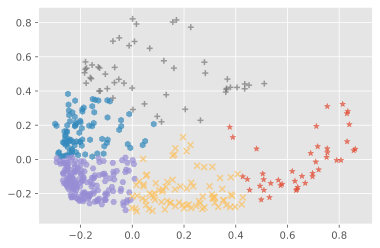

In [7]:
for cluster in np.unique(clusters):
    cluster_data = res_kpca[clusters==cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], alpha=0.7, marker=markers[cluster])

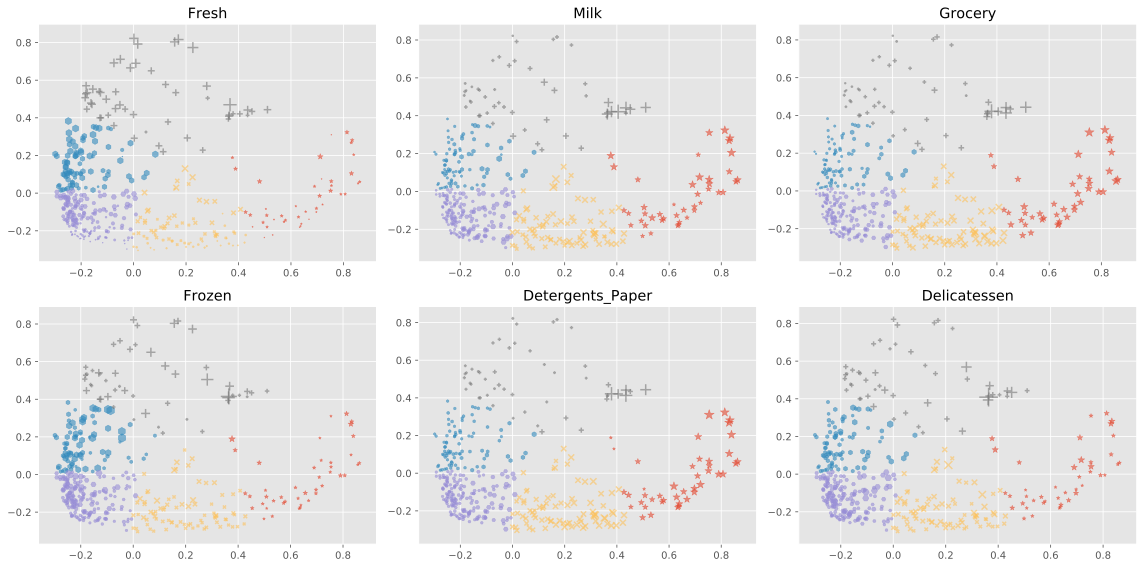

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    for cluster in np.unique(clusters):
        sizes = 20+20*data[:, features.index(feature)][clusters==cluster]
        cluster_data = res_kpca[clusters==cluster]
        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=sizes, alpha=0.6, cmap=cols, marker=markers[cluster], label=f'Cluster {cluster}')
    ax.set_title(feature)
plt.tight_layout()

In [9]:
df['cluster_kpca_rbf'] = clusters
df.to_csv('data_with_clusters.csv')